# Changing context manually on DMCFinger

We'll take a look at how to manually control contexts in this example on the Deepmind Control Suite.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from carl.context.selection import StaticSelector
from carl.envs import CARLDmcFingerEnv

First, let's define the context. Instead of sampling, we can also manually change values. In this case, we simply take the default context and augment it a bit.

In [14]:
long_finger = CARLDmcFingerEnv.get_default_context().copy()
long_finger["limb_length_0"] = long_finger["limb_length_0"] * 2
long_finger["limb_length_1"] = long_finger["limb_length_1"] * 1.75
contexts = {0: CARLDmcFingerEnv.get_default_context(), 1: long_finger}

Then we can use our contexts to instantiate the CARL environment. We choose a StaticSelector since we don't want the context to change on its own.

Currently using finger limb lengths 0.17 and 0.16


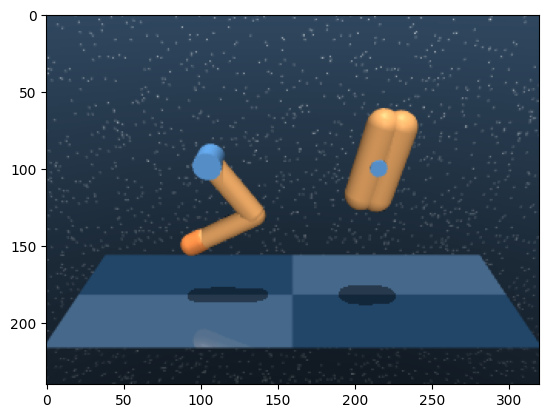

In [15]:
env = CARLDmcFingerEnv(context_selector=StaticSelector(contexts))
render = lambda: plt.imshow(env.render())
env.reset()
print(f"Currently using finger limb lengths {np.round(env.context['limb_length_0'], decimals=2)} and {np.round(env.context['limb_length_1'], decimals=2)}")
render()

This is how the environment looks with a few random steps.

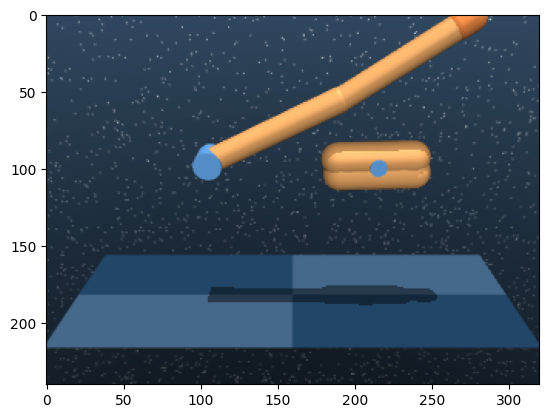

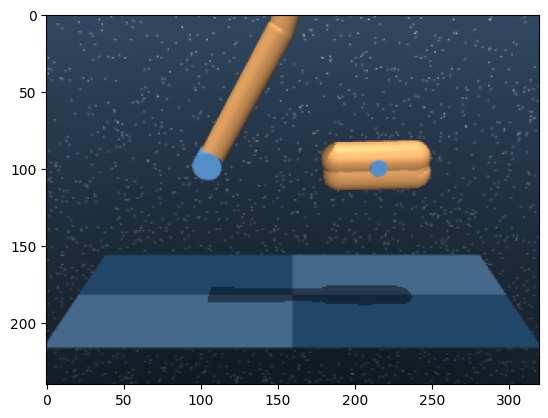

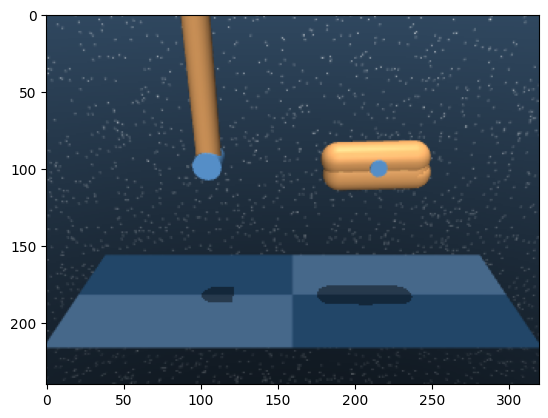

In [19]:
for i in range(30):
    action = env.action_space.sample()
    state, reward, terminated, truncated, info = env.step(action=action)
    if i % 10 == 0:
        plt.figure()
        render()

Now let's change to the long finger version instead. Take a look at our new finger:

Currently using finger limb lengths 0.34 and 0.28


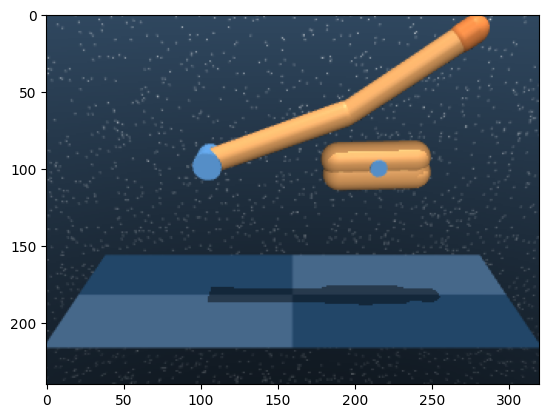

In [17]:
env.context_id = 1
print(f"Currently using finger limb lengths {np.round(env.context['limb_length_0'], decimals=2)} and {np.round(env.context['limb_length_1'], decimals=2)}")
env.reset()
render()

And now let's take a few steps to see it in action:

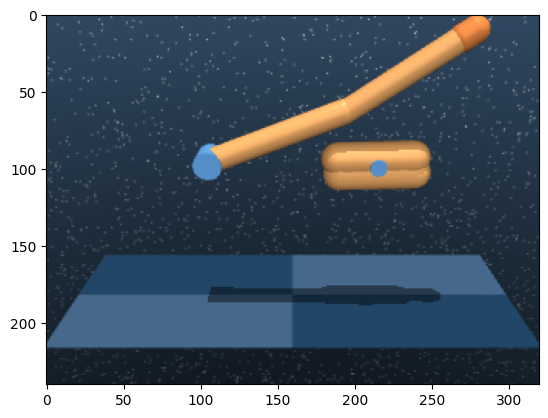

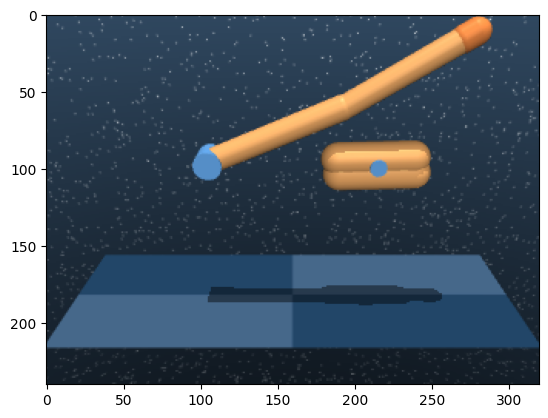

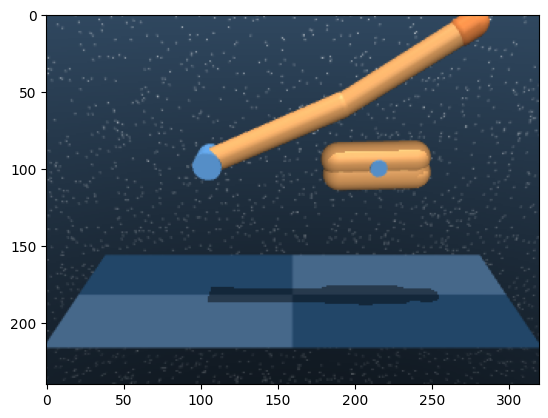

In [18]:
for i in range(30):
    action = env.action_space.sample()
    state, reward, terminated, truncated, info = env.step(action=action)
    if i % 10 == 0:
        plt.figure()
        render()